<a href="https://colab.research.google.com/github/Okonie/BioML/blob/main/HW1_MSU_Konovalov_Pavel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work №1
- Вам предстоит поработать с данными, описывающими биомеханические особенности ортопедических больных. Везде, где требуется написать свой код или ответ, помечено %% 
- You will work with data describing the biomechanical characteristics of orthopedic patients. Wherever you want to write your own code or answer is marked with %%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Оставим вывод только двух чисел после запятой
# Let's leave the output of only two numbers after the decimal point

pd.set_option('precision', 2)

## Шаг 1: Знакомство с таблицей
## Step 1: Introducing the table

In [ ]:
# Загрузим данные из файла column_2C_weka.csv
# Load data from the file column_2C_weka.csv

data = pd.read_csv("column_2C_weka.csv")

In [ ]:
# Какой размер таблицы?
# What is the size of the table?

print(data.shape)

(225, 8)


In [ ]:
# Какие есть признаки в таблице?
# What are the signs in the table?

print(data.columns)

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'jump_height', 'class'],
      dtype='object')


In [ ]:
# Посмотрим первые несколько строк таблицы 
# Let's see the first few rows of the table

data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,34.56,Abnormal
1,49.71,9.65,28.32,40.06,108.17,7.92,10.03,Abnormal
2,NaN,13.92,25.12,26.33,130.33,2.23,NaN,Abnormal


In [ ]:
# Индивидуальный набор samplов размера 200, над которым будет проводиться дальнейшая работа
# An individual set of sampls of size 200, on which further work will be carried out

sample = data.sample(n=200, random_state=1)

## Шаг 2: Изучение на наличие нулевых значений
## Step 2: Zero Value Examination

In [ ]:
# Посмотрим на содержание данных относительно ненулевых значений
# Let's look at the data content regarding non-zero values

sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 39 to 86
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          197 non-null    float64
 1   pelvic_tilt numeric       197 non-null    float64
 2   lumbar_lordosis_angle     198 non-null    float64
 3   sacral_slope              198 non-null    float64
 4   pelvic_radius             197 non-null    float64
 5   degree_spondylolisthesis  197 non-null    float64
 6   jump_height               18 non-null     float64
 7   class                     200 non-null    object 
dtypes: float64(7), object(1)
memory usage: 14.1+ KB


In [ ]:
# Какой столбец сильно выделяется?
# Which column stands out the most?

# Answer: Column jump_height (Only 18 non-null values)

In [ ]:
# Посмотрим на первые несколько строк, где этот столбец is null
# Let's look at the first few rows where this column is null

sample[sample['jump_height'].isnull()].head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
39,74.72,19.76,82.74,54.96,109.36,33.31,NaN,Abnormal
166,40.75,1.84,50.00,38.91,139.25,0.67,NaN,Normal
93,95.38,24.82,95.16,70.56,89.31,57.66,NaN,Abnormal
62,90.51,28.27,69.81,62.24,100.89,58.82,NaN,Abnormal
195,50.09,13.43,34.46,36.66,119.13,3.09,NaN,Normal


In [ ]:
# Является ли он информативным? 
# Is it informative?

# Answer: No - only 18/200 of data has these values.

In [ ]:
# Если нет, то удалите его
# If not, then remove it

sample = sample.drop(columns='jump_height')
sample.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
39,74.72,19.76,82.74,54.96,109.36,33.31,Abnormal
166,40.75,1.84,50.00,38.91,139.25,0.67,Normal
93,95.38,24.82,95.16,70.56,89.31,57.66,Abnormal
62,90.51,28.27,69.81,62.24,100.89,58.82,Abnormal
195,50.09,13.43,34.46,36.66,119.13,3.09,Normal


In [ ]:
# Посмотрим на какой-нибудь еще один столбец, где есть нулевые значения
# Let's look at some other column with zero values

sample[sample['pelvic_radius'].isnull()].head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
55,54.74,12.10,41.00,42.65,NaN,40.38,Abnormal
180,48.17,9.59,39.71,38.58,NaN,5.36,Normal
15,35.49,11.70,15.59,23.79,NaN,-3.46,Abnormal


In [ ]:
# Имеет ли смысл удалять всю стороку, где есть хотя бы один NaN, при условии, что данных мало?
# Does it make sense to delete the entire row where there is at least one NaN, in case that there is not enough data?

# Answer: No, we should save the rows. 

In [ ]:
# Если нет, то что можно сделать еще? Учитывая, что признаки являются количественными, что подойдет лучше всего?
# If not, what else can we do? Given that the traits are quantitative, what is the best fit?

# Answer: We can replace these NaN values with some function of others column like average. 

In [ ]:
# Сделайте выбранное преобразование. Используйте fillna с переданным значение value = sample.mean()
# Make the selected transformation. Use fillna with passed in value = sample.mean ()

sample[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']] = sample[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']].fillna(value=sample[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']].mean()) 

sample.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
39,74.72,19.76,82.74,54.96,109.36,33.31,Abnormal
166,40.75,1.84,50.00,38.91,139.25,0.67,Normal
93,95.38,24.82,95.16,70.56,89.31,57.66,Abnormal
62,90.51,28.27,69.81,62.24,100.89,58.82,Abnormal
195,50.09,13.43,34.46,36.66,119.13,3.09,Normal


In [ ]:
# Посмотрим на содержание данных относительно ненулевых значений теперь
# Let's look at the data content regarding non-zero values now

sample.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 39 to 86
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          200 non-null    float64
 1   pelvic_tilt numeric       200 non-null    float64
 2   lumbar_lordosis_angle     200 non-null    float64
 3   sacral_slope              200 non-null    float64
 4   pelvic_radius             200 non-null    float64
 5   degree_spondylolisthesis  200 non-null    float64
 6   class                     200 non-null    object 
dtypes: float64(6), object(1)
memory usage: 12.5+ KB


## Шаг 3: сбалансированность классов
## Step 3: Class balance

Text(0, 0.5, 'Counts')

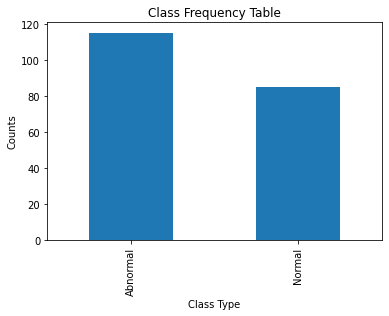

In [ ]:
# Исследуем сбалансированность классов.
# Let's explore the balance of classes.

sample['class'].value_counts().plot(kind='bar')
plt.title('Class Frequency Table')
plt.xlabel('Class Type')
plt.xticks(rotation='vertical')
plt.ylabel('Counts')

In [ ]:
# Все в порядке? 
# Everything is fine?

# Answer: Balance is not ideal, but in our original data the ratio was also 125 to 100.
# Lets work with such a distribution.  

## Шаг 4: Выбросы
## Step 4: Data outliers

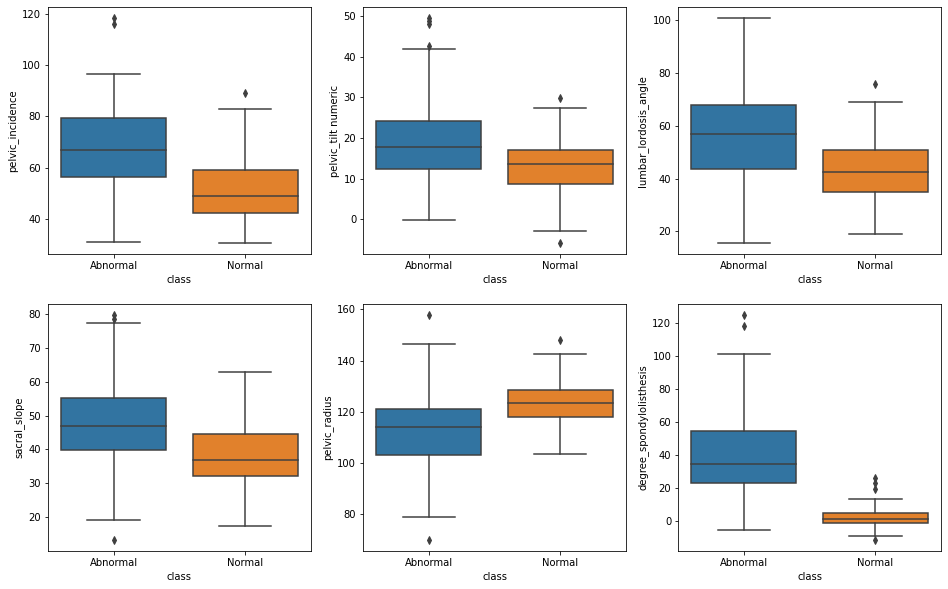

In [ ]:
# Исследуем данные на выбросы.
# Examining the data outliers.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, feat in  enumerate(sample.columns[:6]):
    sns.boxplot(x='class', y=feat, data=sample, ax=axes[int(idx / 3), idx % 3])
    axes[int(idx / 3), idx % 3].set_xlabel('class')
    axes[int(idx / 3), idx % 3].set_ylabel(feat);

In [ ]:
# Имееются ли выбросы?
# Are there outliers?

# Answer: Yes, column have a lot of data outliers for both classes. 

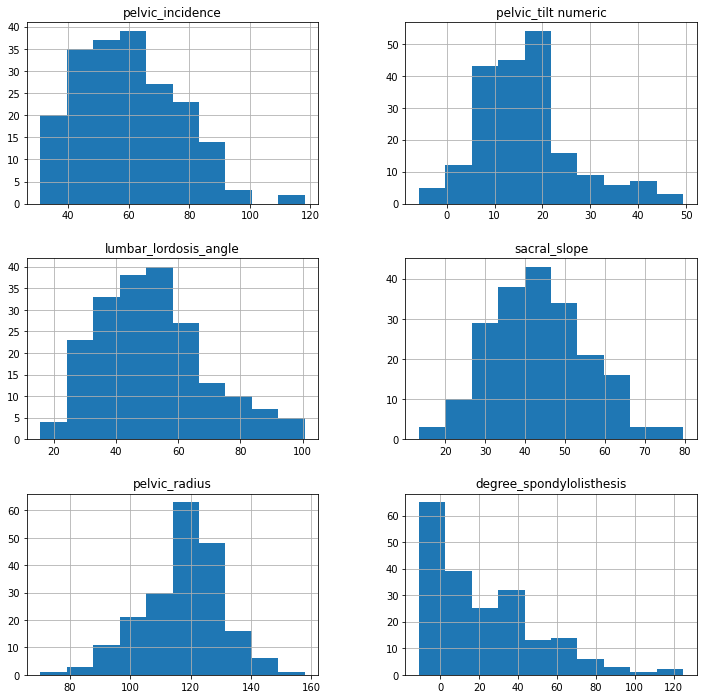

In [ ]:
# Посмотрим на смещение данных. 
# Let's look at the data offset.

sample[sample.columns[:6]].hist(figsize=(12,12));

In [ ]:
# Какие признаки имеют смещение? Согласуются ли boxplot и histogram для признаков между собой?
# What are the signs of displacement? Are boxplot and histogram for features consistent?

# Answer: Displacement of data in 'degree_spondylolisthesis', 'pelvic_incidence', 'lumbar_lordosis_angle' and 'pelvic_tilt numeric'

In [ ]:
# Удалим выбросы, выступающие за границы 3 сигма
# Remove outliers beyond 3 sigma boundaries

low = 0.01
high = 0.99
quant_data = sample.quantile([low, high])
for name in list(sample.drop(labels=['class'], axis=1).columns):
    sample = sample[(sample[name] > quant_data.loc[low, name]) & (sample[name] < quant_data.loc[high, name])]

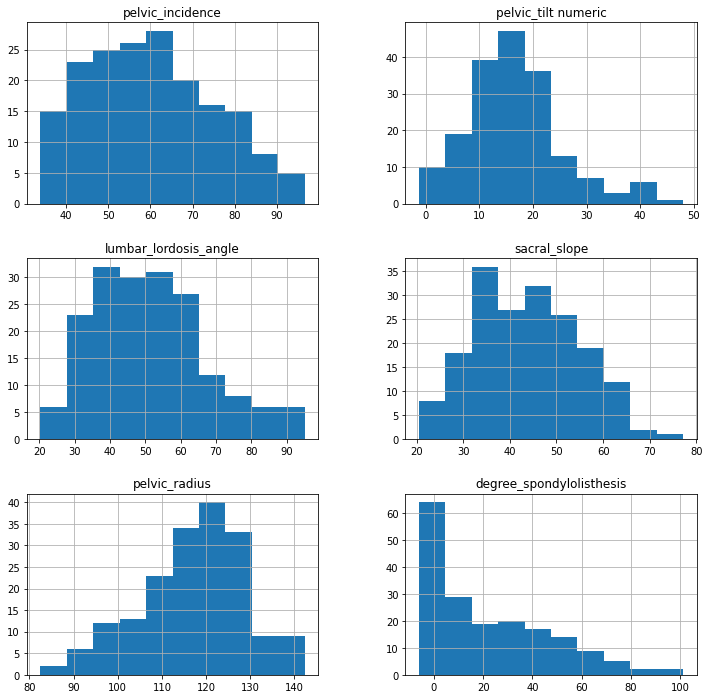

In [ ]:
# Посмотрим на смещение данных теперь
# Let's look at the data offset now

sample[sample.columns[:6]].hist(figsize=(12,12));

## Шаг 5: Scale
## Step 5: Scale

In [ ]:
# Разделим таблицу на X и Y
# Divide the table into X and Y

X = sample.drop(labels=['class'], axis=1)
Y = sample['class']
# и на train и test  отношении 80/20 процентов
# and on train and test ratio 80/20 percent

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Проведем scaling данных
# Scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_array = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

X_test_array = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

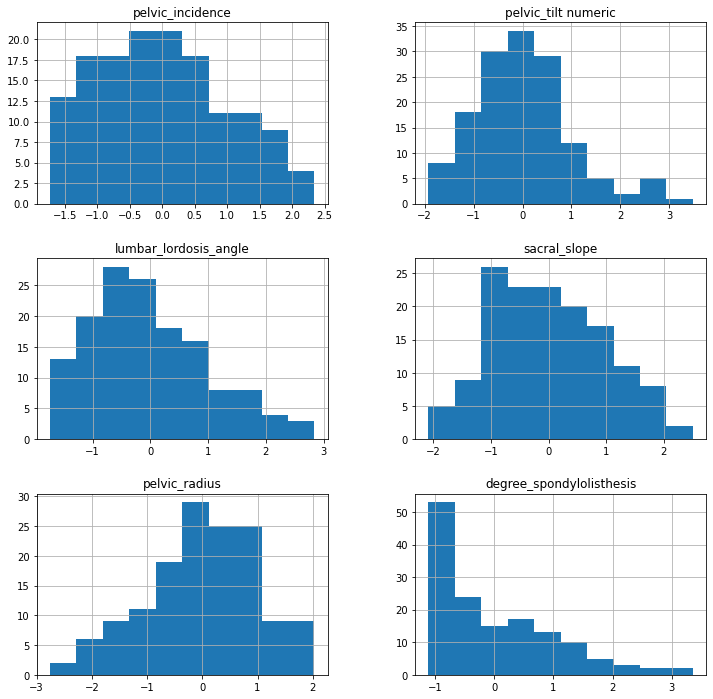

In [ ]:
# Посмотрим на гистограммы признаков
# Let's look at feature histograms

X_train[X_train.columns[:6]].hist(figsize=(12,12));

In [ ]:
# Что изменилось?
# What changed?

# Answer: Normalization along the x axis and on the y-axis

## Шаг 6: PCA
## Step 6: PCA

In [ ]:
# Создайте класс PCA для шести компонент и обучите на X_train
# Create a PCA class for six components and train on X_train

pca = PCA(n_components=6)  
pca.fit(X_train)    

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Проведите трансформацию PCA
# Conduct the PCA transformation

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

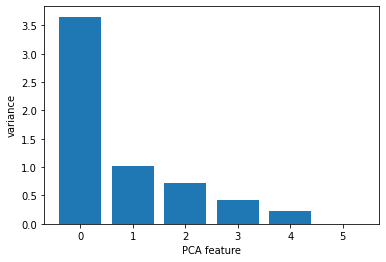

In [ ]:
# Построим bar plot
# Let's build a bar plot

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

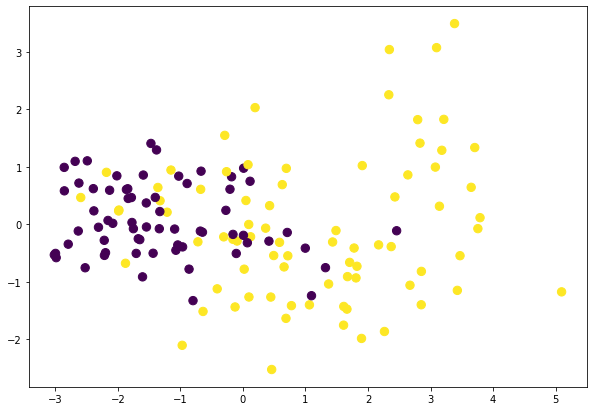

In [ ]:
# Переведем Y_train в числовые значения
# Convert Y_train to numeric values

d = dict(zip(set(Y_train), [0,1]))
label = list()
for i in Y_train:
    label.append(d[i])

# И построим на двух компонентах
# And build on two components

plt.figure(figsize=(10,7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=label, s=70, cmap='viridis')
plt.show()

Text(0.5, 1.0, 'PC1 vs PC3')

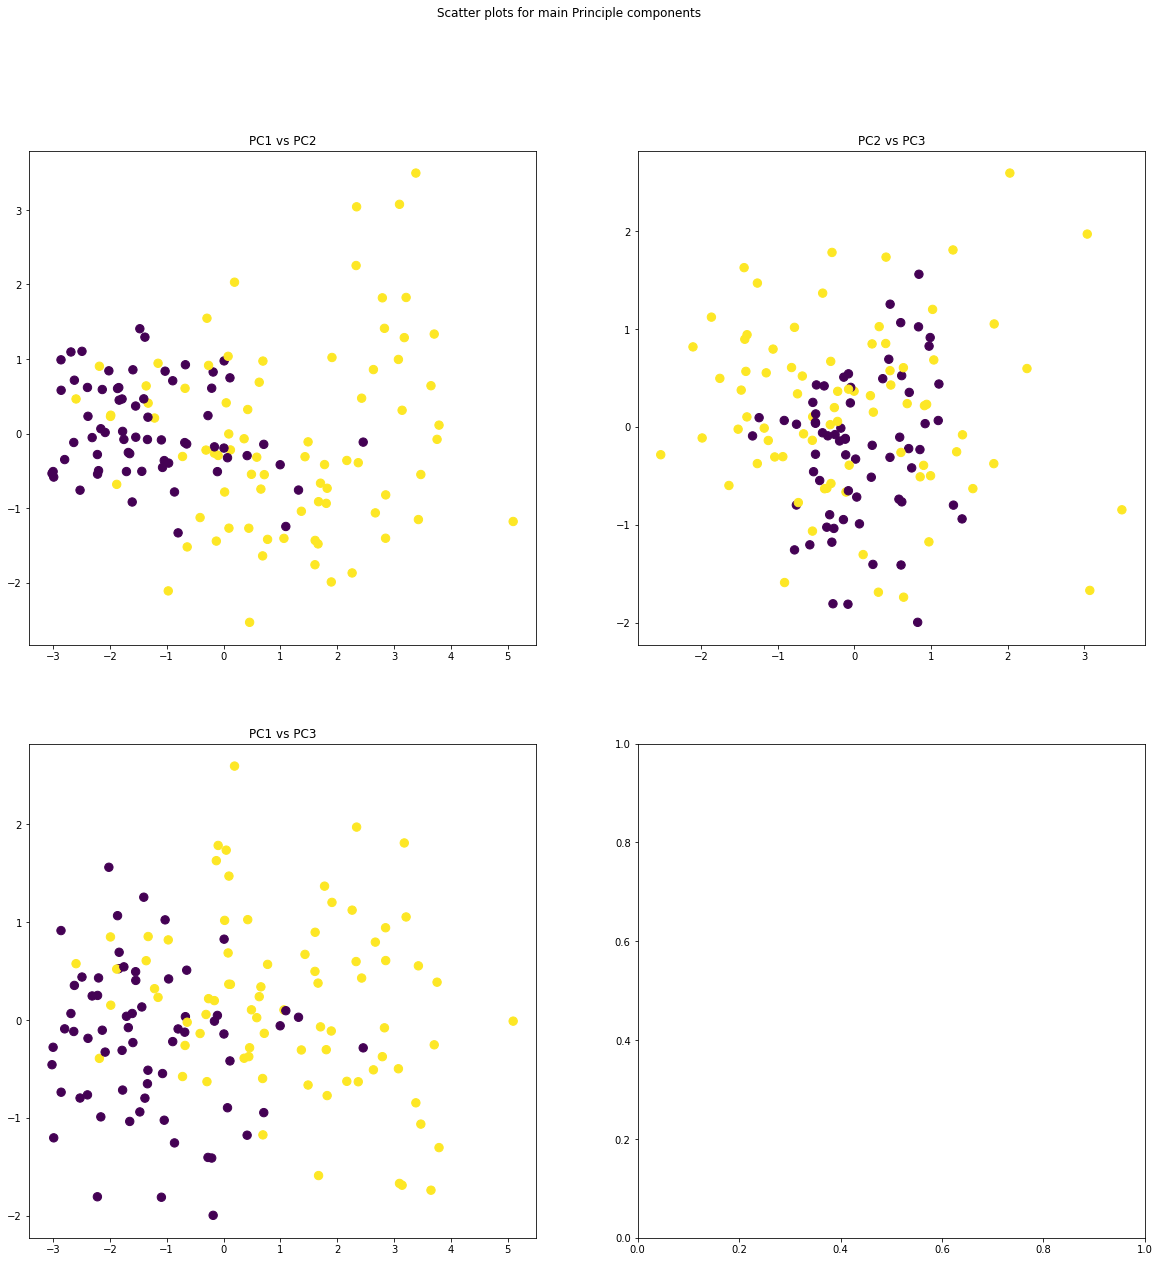

In [ ]:
# Постойте попарно 1-2, 2-3, 1-3 компоненты
# Stand in pairs 1-2, 2-3, 1-3 components

fig, ax=plt.subplots(nrows=2, ncols=2,figsize=(20,20))
fig.suptitle('Scatter plots for main Principle components')
ax[0,0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=label, s=70, cmap='viridis')
ax[0,0].set_title('PC1 vs PC2')
ax[0,1].scatter(X_train_pca[:, 1], X_train_pca[:, 2], c=label, s=70, cmap='viridis')
ax[0,1].set_title('PC2 vs PC3')
ax[1,0].scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=label, s=70, cmap='viridis')
ax[1,0].set_title('PC1 vs PC3')

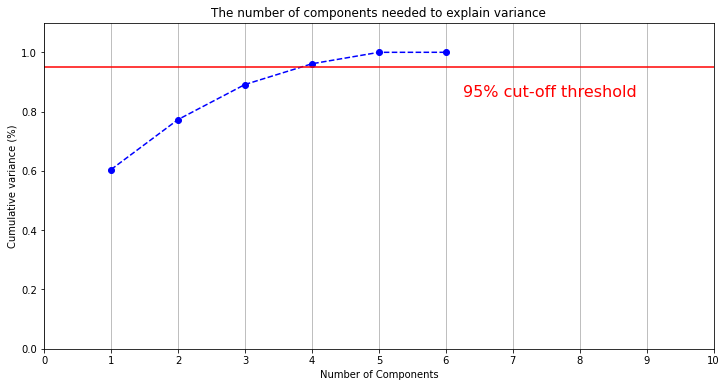

In [ ]:
# Выведите, сколько компонент объясняют >95% variance
# Print how many components explain> 95% variance

pca = PCA().fit(X_train)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 7, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(6.25, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

We need 4 components.